# Explanatory Data Analysis (combining population data)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the datasets
weather_dengue_cases = pd.read_csv('Dataset_dengue_weather.csv')
population_data = pd.read_csv('Population_District_Sri_Lanka.csv')

In [ ]:
# Printing initial rows of loaded datasets
print(weather_dengue_cases.head(5))
print(population_data.head(5))

  District  Number_of_Cases Week_Start_Date  Month  Year  Week Week_End_Date  \
0   Ampara                0      2007-01-01      1  2007     1    2007-01-08   
1   Ampara                0      2007-01-08      1  2007     2    2007-01-15   
2   Ampara                0      2007-01-15      1  2007     3    2007-01-22   
3   Ampara                0      2007-01-22      1  2007     4    2007-01-29   
4   Ampara                0      2007-01-29      1  2007     5    2007-02-05   

   Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
0            26.9375            21.8625                     28.8500   
1            26.3500            23.3250                     30.2625   
2            27.2125            23.1625                     29.5750   
3            26.7250            23.0375                     29.9500   
4            27.3625            22.9625                     30.7500   

   Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
0               

In [ ]:
population_data.shape

(425, 3)

In [ ]:
# Identify unique values in the 'district' column
unique_names = population_data['district'].unique()

print(unique_names)

['Colombo' 'Gampaha' 'Kalutara' 'Kandy' 'Matale' 'NuwaraEliya' 'Galle'
 'Matara' 'Hambantota' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Mullaitivu' 'Batticaloa' 'Ampara' 'Trincomalee' 'Kurunegala' 'Puttalam'
 'Anuradhapura' 'Polonnaruwa' 'Badulla' 'Moneragala' 'Ratnapura' 'Kegalle']


In [ ]:
weather_dengue_cases.shape

(22950, 19)

In [ ]:
# Identify unique values in the 'District column
unique_districts = weather_dengue_cases['District'].unique()

print(unique_districts)

['Ampara' 'Anuradhapura' 'Badulla' 'Batticaloa' 'Colombo' 'Galle'
 'Gampaha' 'Hambantota' 'Jaffna' 'Kalutara' 'Kandy' 'Kegalle'
 'Kilinochchi' 'Kurunegala' 'Mannar' 'Matale' 'Matara' 'Monaragala'
 'Mullaitivu' 'NuwaraEliya' 'Polonnaruwa' 'Puttalam' 'Ratnapura'
 'Trincomalee' 'Vavuniya']


In [ ]:
# Correcting the district name in the population_data dataset from Moneragala to Monaragala
# Replace 'Moneragala' with 'Monaragala'
population_data['district'] = population_data['district'].replace('Moneragala', 'Monaragala')

In [ ]:
# Identify unique values in the 'district' column after correction
unique_names_corrected = population_data['district'].unique()

print(unique_names_corrected)

['Colombo' 'Gampaha' 'Kalutara' 'Kandy' 'Matale' 'NuwaraEliya' 'Galle'
 'Matara' 'Hambantota' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Mullaitivu' 'Batticaloa' 'Ampara' 'Trincomalee' 'Kurunegala' 'Puttalam'
 'Anuradhapura' 'Polonnaruwa' 'Badulla' 'Monaragala' 'Ratnapura' 'Kegalle']


In [ ]:
# Renaming columns to use the same column names on both datasets
df_population = population_data.rename(columns={'year': 'Year', 'district': 'District','total_population':'Total Population'})

In [ ]:
print (df_population.head(5))

   Year  Total Population District
0  2007           2270352  Colombo
1  2008           2284182  Colombo
2  2009           2298012  Colombo
3  2010           2311842  Colombo
4  2011           2325673  Colombo


In [ ]:
# Identify unique values in the 'Year' column im population and weather dataset
unique_years_pop = df_population['Year'].unique()
print(unique_years_pop)
unique_years_weather = weather_dengue_cases['Year'].unique()
print(unique_years_weather)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


In [ ]:
# Merging the DataFrames on 'Year' and 'District'
merged_df = pd.merge(weather_dengue_cases, df_population, on=['Year', 'District'], how='inner')

print(merged_df.head(5))

  District  Number_of_Cases Week_Start_Date  Month  Year  Week Week_End_Date  \
0   Ampara                0      2007-01-01      1  2007     1    2007-01-08   
1   Ampara                0      2007-01-08      1  2007     2    2007-01-15   
2   Ampara                0      2007-01-15      1  2007     3    2007-01-22   
3   Ampara                0      2007-01-22      1  2007     4    2007-01-29   
4   Ampara                0      2007-01-29      1  2007     5    2007-02-05   

   Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
0            26.9375            21.8625                     28.8500   
1            26.3500            23.3250                     30.2625   
2            27.2125            23.1625                     29.5750   
3            26.7250            23.0375                     29.9500   
4            27.3625            22.9625                     30.7500   

   Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
0               

In [ ]:
merged_df.shape

(22200, 20)

In [ ]:
merged_df.isnull().sum()

District                         0
Number_of_Cases                  0
Week_Start_Date                  0
Month                            0
Year                             0
Week                             0
Week_End_Date                    0
Avg Max Temp (°C)                0
Avg Min Temp (°C)                0
Avg Apparent Max Temp (°C)       0
Avg Apparent Min Temp (°C)       0
Total Precipitation (mm)         0
Total Rain (mm)                  0
Avg Wind Speed (km/h)            0
Max Wind Gusts (km/h)            0
Weather Code                     0
Avg Daylight Duration (hours)    0
Avg Sunrise Time                 0
Avg Sunset Time                  0
Total Population                 0
dtype: int64

In [ ]:
merged_df.columns

Index(['District', 'Number_of_Cases', 'Week_Start_Date', 'Month', 'Year',
       'Week', 'Week_End_Date', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
       'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
       'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)',
       'Max Wind Gusts (km/h)', 'Weather Code',
       'Avg Daylight Duration (hours)', 'Avg Sunrise Time', 'Avg Sunset Time',
       'Total Population'],
      dtype='object')

In [ ]:
# Calcutating the Correlation Matrix

correlation_matrix_merged = merged_df.corr()
print(correlation_matrix_merged)

                               Number_of_Cases     Month      Year      Week  \
Number_of_Cases                       1.000000  0.026049  0.193568  0.022745   
Month                                 0.026049  1.000000 -0.003029  0.953479   
Year                                  0.193568 -0.003029  1.000000  0.004080   
Week                                  0.022745  0.953479  0.004080  1.000000   
Avg Max Temp (°C)                    -0.034232 -0.128789  0.070832 -0.111790   
Avg Min Temp (°C)                     0.027359  0.035112 -0.016681  0.047980   
Avg Apparent Max Temp (°C)            0.008115 -0.111268  0.065898 -0.090606   
Avg Apparent Min Temp (°C)            0.059909  0.032787 -0.004764  0.047635   
Total Precipitation (mm)              0.086056  0.284875  0.039778  0.289858   
Total Rain (mm)                       0.086056  0.284875  0.039778  0.289858   
Avg Wind Speed (km/h)                -0.011072  0.049897  0.066058  0.055724   
Max Wind Gusts (km/h)                -0.

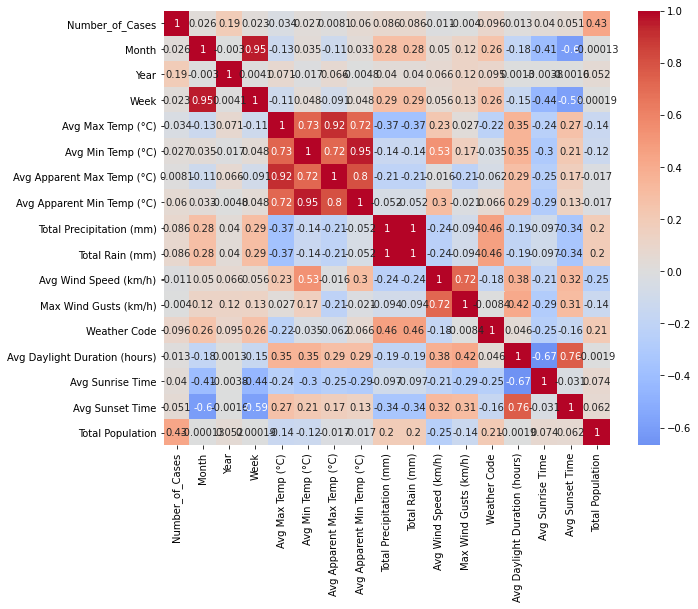

In [ ]:
# Creating the heatmap with correlation between the variables

# Customize the size of the heatmap
plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix_merged, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

In [ ]:
# Removing Total Precipitation as it is the same as Total Rain.
# Removing Average Max and Min Apparent Temperatures as they are highly correlated with Min Max Temperature
# Removing Weather code as it is a categorical variable with no correlation with the other variables
# Removing Week Start Date and Week End Date, leaving just Week as a variable representing the week.
# Removing Sunrise and Sunset Time, leaving just average daylight duration to represent these variables
# Removing Max Wind Gusts (km/h) as it has very low correlation with target variable


df = merged_df.drop(columns=['Week_Start_Date', 'Week_End_Date',
       'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
       'Total Precipitation (mm)',
       'Weather Code', 'Avg Sunrise Time', 'Avg Sunset Time','Max Wind Gusts (km/h)'])

print(df.head(5))


  District  Number_of_Cases  Month  Year  Week  Avg Max Temp (°C)  \
0   Ampara                0      1  2007     1            26.9375   
1   Ampara                0      1  2007     2            26.3500   
2   Ampara                0      1  2007     3            27.2125   
3   Ampara                0      1  2007     4            26.7250   
4   Ampara                0      1  2007     5            27.3625   

   Avg Min Temp (°C)  Total Rain (mm)  Avg Wind Speed (km/h)  \
0            21.8625              8.0                18.2000   
1            23.3250             86.1                17.0250   
2            23.1625              3.1                20.1875   
3            23.0375             53.6                17.2000   
4            22.9625              8.2                17.2625   

   Avg Daylight Duration (hours)  Total Population  
0                      11.714583            597939  
1                      11.733333            597939  
2                      11.754167         

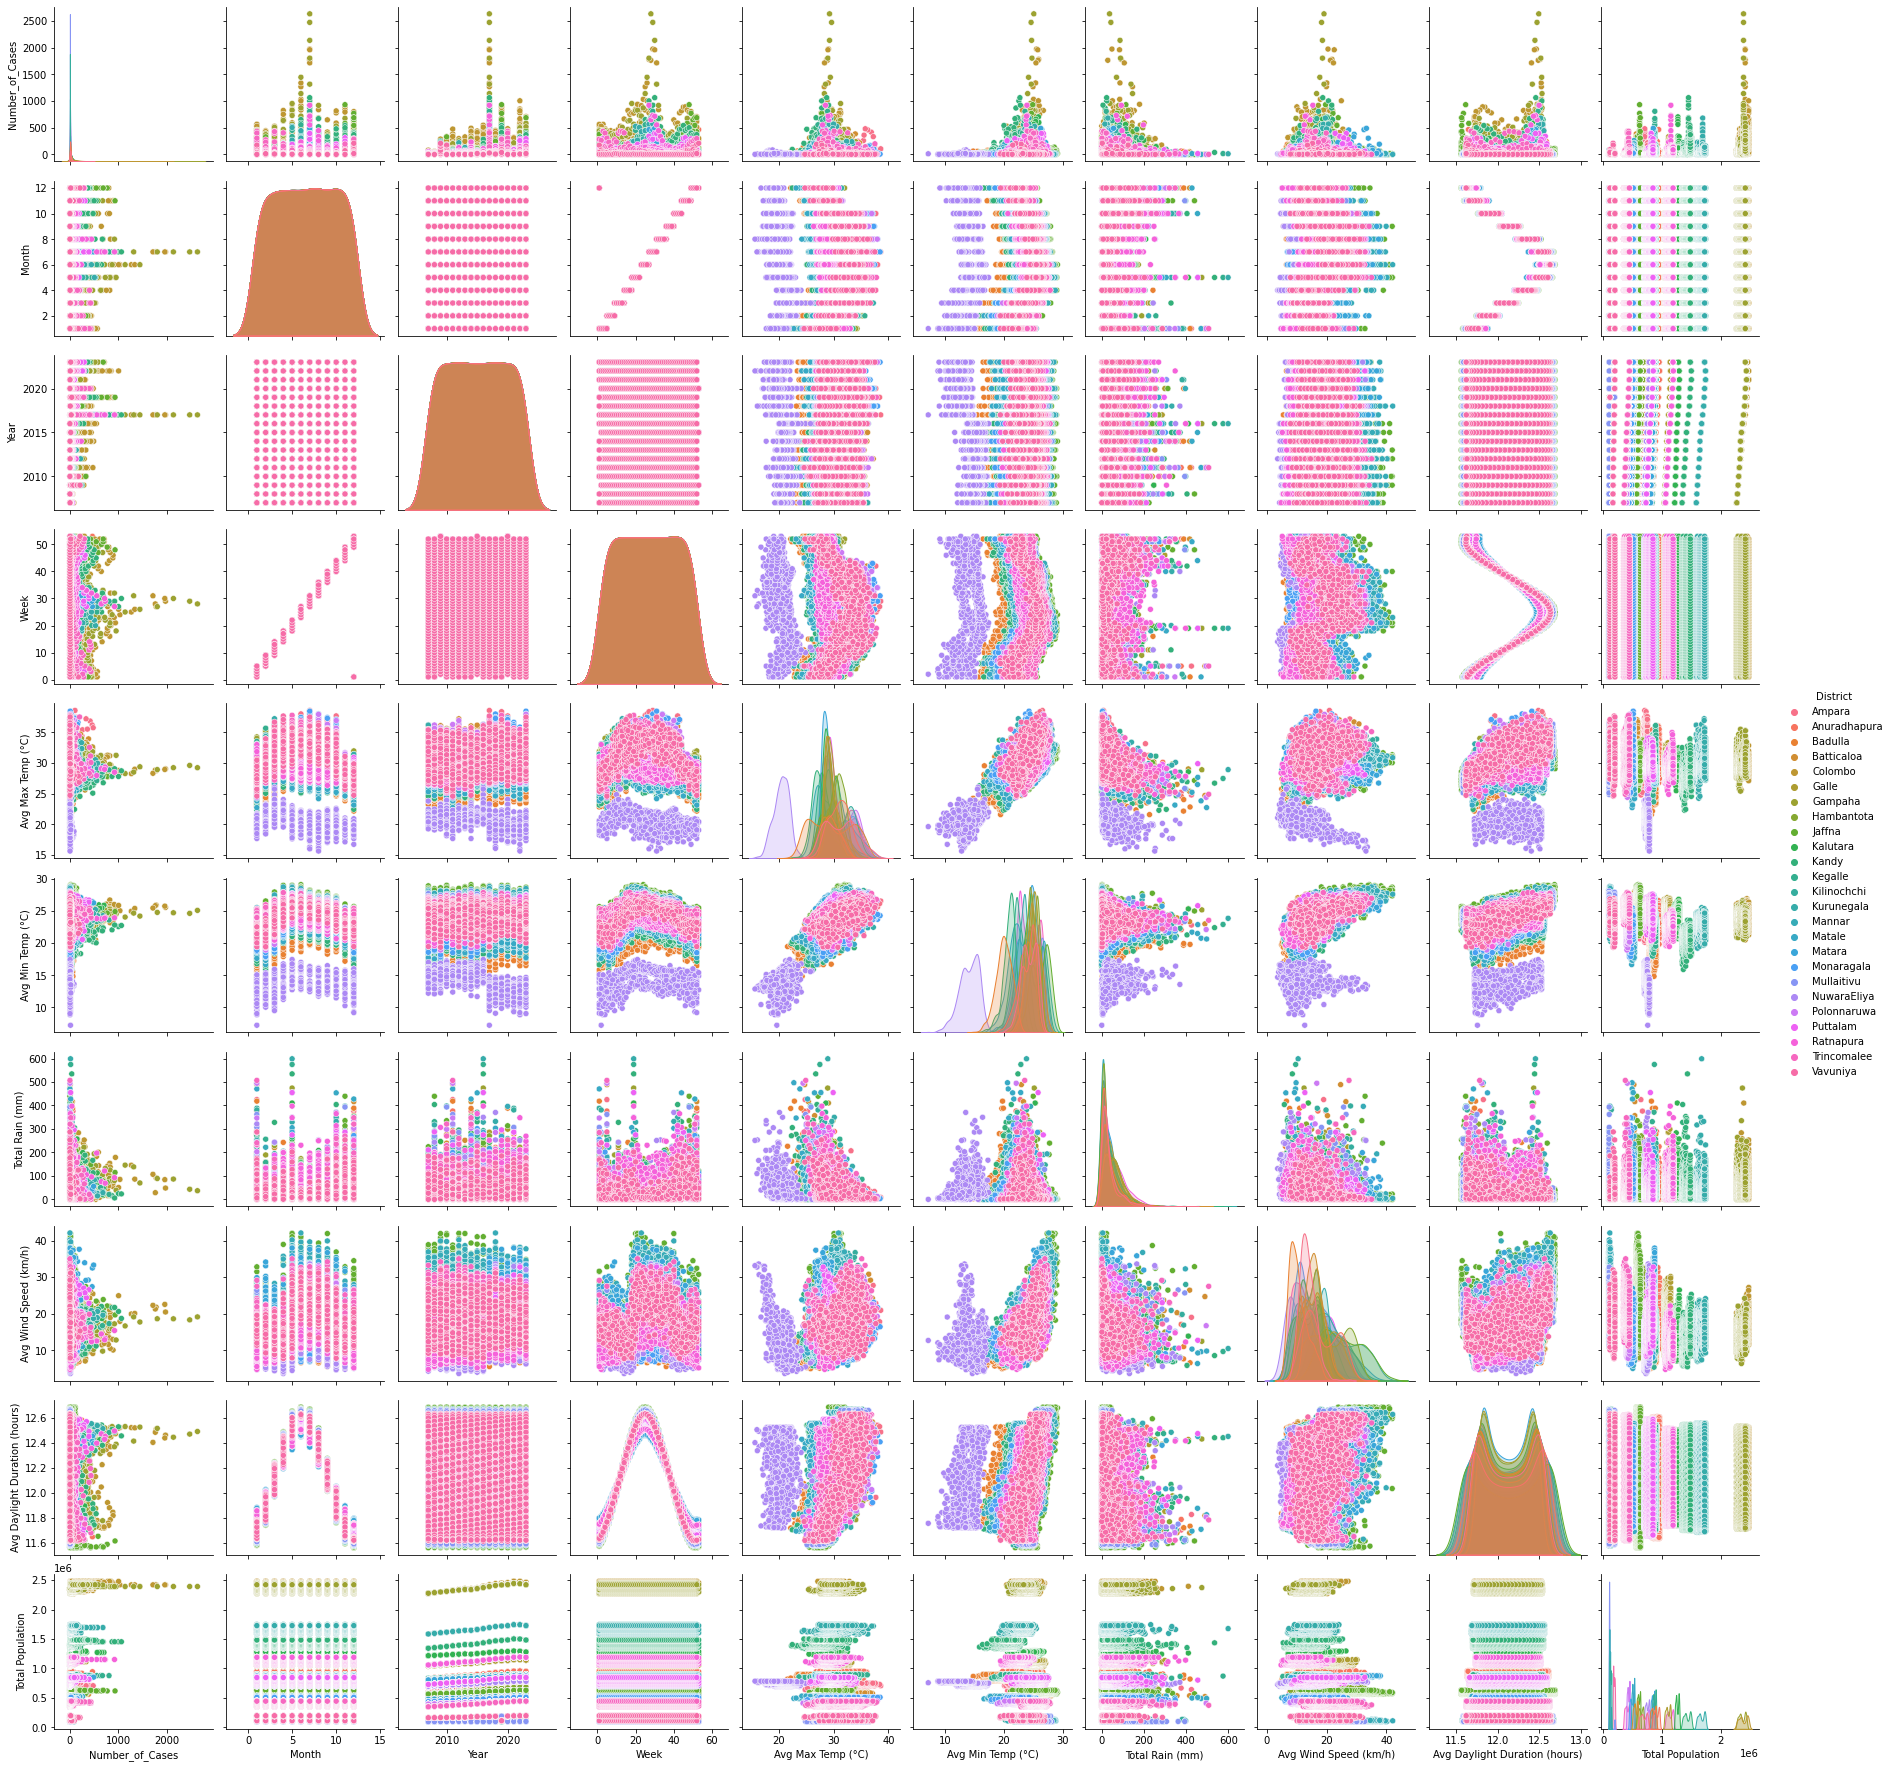

In [ ]:
# Pair plot with KDE plots on the diagonal
sns.pairplot(df, hue='District', diag_kind='kde')
plt.show()

In [ ]:
# Calcutating the Correlation Matrix

correlation_matrix = df.corr()
print(correlation_matrix)

                               Number_of_Cases     Month      Year      Week  \
Number_of_Cases                       1.000000  0.026049  0.193568  0.022745   
Month                                 0.026049  1.000000 -0.003029  0.953479   
Year                                  0.193568 -0.003029  1.000000  0.004080   
Week                                  0.022745  0.953479  0.004080  1.000000   
Avg Max Temp (°C)                    -0.034232 -0.128789  0.070832 -0.111790   
Avg Min Temp (°C)                     0.027359  0.035112 -0.016681  0.047980   
Total Rain (mm)                       0.086056  0.284875  0.039778  0.289858   
Avg Wind Speed (km/h)                -0.011072  0.049897  0.066058  0.055724   
Avg Daylight Duration (hours)         0.012648 -0.184166  0.001263 -0.149269   
Total Population                      0.428586 -0.000132  0.051851  0.000189   

                               Avg Max Temp (°C)  Avg Min Temp (°C)  \
Number_of_Cases                        -0.034232

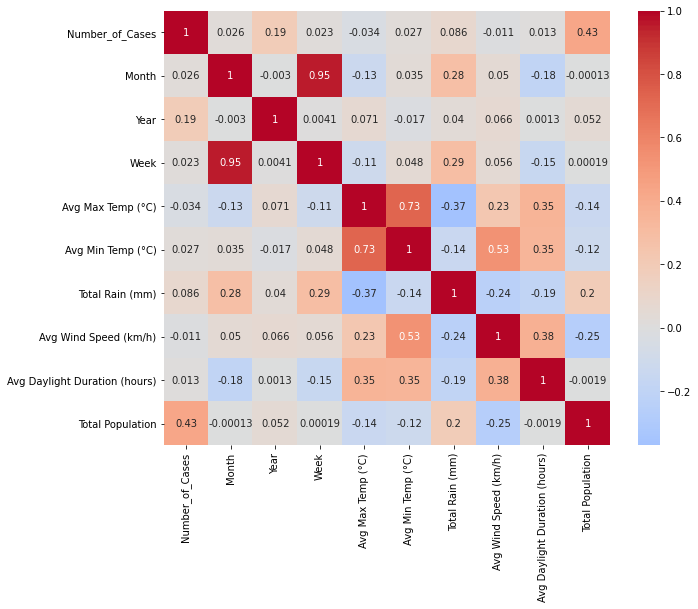

In [ ]:
# Creating the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

In [ ]:
# Creating a lagged variable for Total Rain and Max Temperature to see if it correlates better with Number of Cases

# Convert Week_Start_Date to datetime
merged_df['Week_Start_Date'] = pd.to_datetime(merged_df['Week_Start_Date'])

# Set the date column as the index
merged_df.set_index('Week_Start_Date', inplace=True)

In [ ]:
# Assuming df is your DataFrame with a DatetimeIndex
df_lagged = merged_df.copy()

# Create lagged variables for weather parameters (1 month lag or 4 weeks lag)
for param in [
    'Avg Max Temp (°C)',
    'Avg Min Temp (°C)',
    'Total Rain (mm)'
]:
    df_lagged[f'{param}_lag4'] = df_lagged[param].shift(4)

In [ ]:
# Calculate correlations with lagged variables (4 weeks)
lagged_corr = df_lagged[['Number_of_Cases'] + [col for col in df_lagged.columns if '_lag4' in col]].corr()
lagged_corr

,Number_of_Cases,Avg Max Temp (°C)_lag4,Avg Min Temp (°C)_lag4,Total Rain (mm)_lag4
Number_of_Cases,1.000000,-0.040288,0.032411,0.124010
Avg Max Temp (°C)_lag4,-0.040288,1.000000,0.731834,-0.371163
Avg Min Temp (°C)_lag4,0.032411,0.731834,1.000000,-0.141434
Total Rain (mm)_lag4,0.124010,-0.371163,-0.141434,1.000000


In [ ]:
# Create lagged variables for weather parameters (2 month lag or 8 weeks lag)
for param in [
    'Avg Max Temp (°C)',
    'Avg Min Temp (°C)',
    'Total Rain (mm)'
]:
    df_lagged[f'{param}_lag8'] = df_lagged[param].shift(8)

In [ ]:
# Calculate correlations with lagged variables (8 weeks)
lagged_corr_8 = df_lagged[['Number_of_Cases'] + [col for col in df_lagged.columns if '_lag8' in col]].corr()
lagged_corr_8

,Number_of_Cases,Avg Max Temp (°C)_lag8,Avg Min Temp (°C)_lag8,Total Rain (mm)_lag8
Number_of_Cases,1.000000,-0.025059,0.038730,0.143072
Avg Max Temp (°C)_lag8,-0.025059,1.000000,0.731836,-0.371172
Avg Min Temp (°C)_lag8,0.038730,0.731836,1.000000,-0.141406
Total Rain (mm)_lag8,0.143072,-0.371172,-0.141406,1.000000


In [ ]:
# Create lagged variables for weather parameters (1 month lag or 12 weeks lag)
for param in [
    'Avg Max Temp (°C)',
    'Avg Min Temp (°C)',
    'Total Rain (mm)'
]:
    df_lagged[f'{param}_lag12'] = df_lagged[param].shift(12)

In [ ]:
# Calculate correlations with lagged variables (8 weeks)
lagged_corr_12 = df_lagged[['Number_of_Cases'] + [col for col in df_lagged.columns if '_lag12' in col]].corr()
lagged_corr_12

,Number_of_Cases,Avg Max Temp (°C)_lag12,Avg Min Temp (°C)_lag12,Total Rain (mm)_lag12
Number_of_Cases,1.000000,0.008952,0.041868,0.088426
Avg Max Temp (°C)_lag12,0.008952,1.000000,0.731872,-0.371445
Avg Min Temp (°C)_lag12,0.041868,0.731872,1.000000,-0.141403
Total Rain (mm)_lag12,0.088426,-0.371445,-0.141403,1.000000


A two months or 4 weeks lag of Total Rain variable showed a greater correlation with the number of cases.
No significant change in correlation was noticed with lagged Min Max Temp variables

This analysis showed the seasonality of dengue cases with increases in particular weeks.
The most significant factors affecting number of cases were total population, lagged total rain (8weeks0. Weather conditions showed lower correlations with dengue number of cases.